# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Create a dataset

In [2]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

In [3]:
X.shape, y.shape

((100, 1), (100,))

# Scatter Plot X vs y

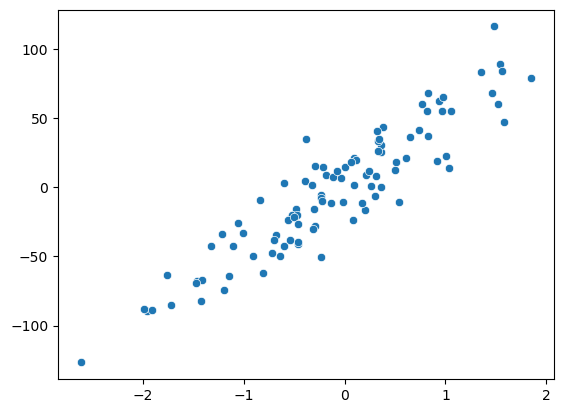

In [4]:
sns.scatterplot(x=X.ravel(), y=y.ravel());

# Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

# Linear Regression

In [7]:
lr = LinearRegression()

## Fit the model

In [8]:
lr.fit(X_train, y_train)

LinearRegression()

## Prediction on test data

In [9]:
y_pred_lr = lr.predict(X_test)

## R2 Score

In [10]:
print('R2 score using Linear Regression: ', r2_score(y_test, y_pred_lr))

R2 score using Linear Regression:  0.8019015156159199


## Coefficient and Intercept

In [11]:
print(f'Coefficient: {lr.coef_} \nIntercept: {lr.intercept_}')

Coefficient: [46.747264] 
Intercept: 0.19844442845175614


# Lasso Regression - using multiple alphas

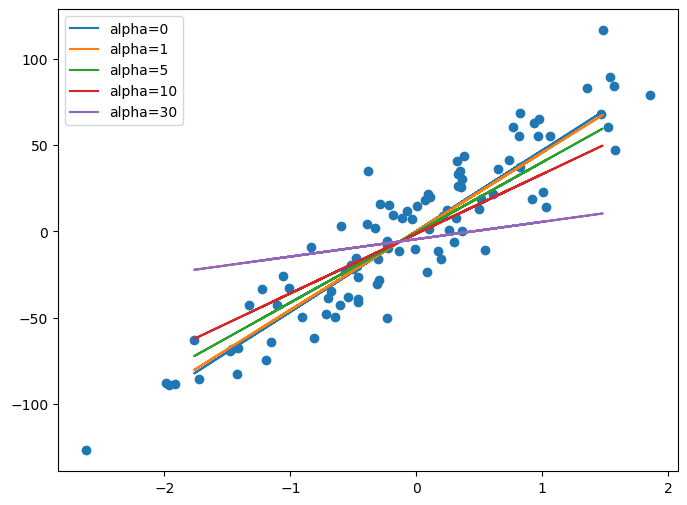

In [12]:
alphas = [0, 1, 5, 10, 30]
plt.figure(figsize=(8,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train, y_train)
    y_pred_lasso = L.predict(X_test)
    plt.plot(X_test, y_pred_lasso, label='alpha={}'.format(i))
plt.legend()
plt.show()

- As the alpha value increases, the slope of the best fit line decreases. Which means the coefficients are getting penalized.

# Lasso Regression for non-linear data

## Create some non-linear data

In [13]:
x1 = 5 * np.random.rand(100, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(100, 1)

## Scatter Plot x1 vs x2

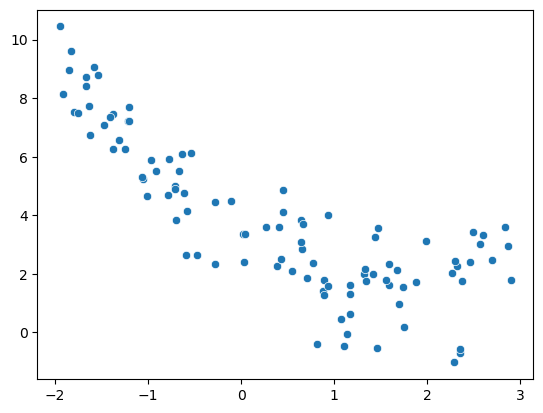

In [14]:
sns.scatterplot(x=x1.ravel(), y=x2.ravel());

## Prediction and best fit line

In [15]:
def get_preds_lasso(x1, x2, alpha):
    model = Pipeline(
        steps=
        [
            ('poly_feats', PolynomialFeatures(degree=16)),
            ('lasso', Lasso(alpha=alpha))
        ]
    )
    model.fit(x1, x2)
    return model.predict(x1)

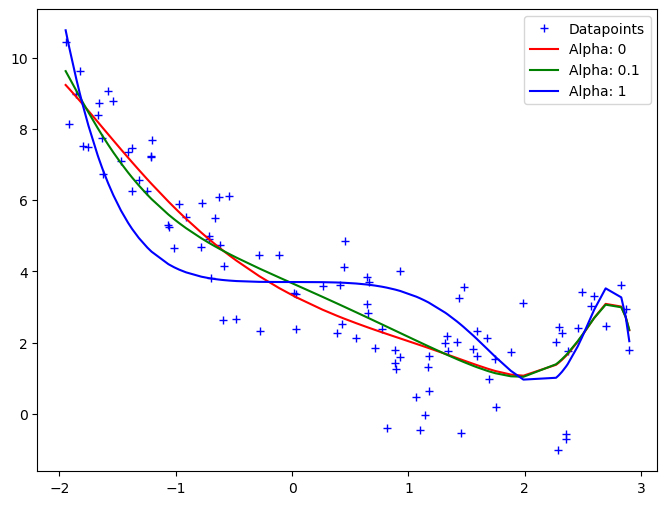

In [16]:
alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(8, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

- Alpha = 0 - Red line -Linear Regression - Over Fitting
- Alpha = 0.1 - Green line - Lasso Regression - Best fits the points
- Alpha = 1 - Blue line - Lasso Regression - Under Fitting

# Lasso Regression using LassoCV

In [17]:
lassoCV = LassoCV()

## Fit the model

In [18]:
lassoCV.fit(X_train, y_train)

LassoCV()

## Prediction on test data

In [19]:
y_pred_lassoCV = lassoCV.predict(X_test)

## R2 Score

In [20]:
print('R2 score using LassoCV: ', r2_score(y_test, y_pred_lassoCV))

R2 score using LassoCV:  0.8018191196733021


## Coefficent and Intercept

In [21]:
print(f'Coefficient: {lassoCV.coef_} \nIntercept: {lassoCV.intercept_}')

Coefficient: [46.70051673] 
Intercept: 0.19243018525412126


## Alphas

In [22]:
print('Alphas used: ', lassoCV.alphas_)

Alphas used:  [38.22970057 35.6531467  33.25024394 31.00928878 28.9193665  26.97029799
 25.15259017 23.45738978 21.87644022 20.40204136 19.02701206 17.74465513
 16.54872476 15.4333961  14.39323685 13.42318086 12.5185034  11.67479817
 10.88795585 10.15414406  9.46978874  8.83155667  8.23633931  7.68123761
  7.1635479   6.68074875  6.23048864  5.81057456  5.41896128  5.05374143
  4.71313617  4.39548657  4.09924548  3.82297006  3.56531467  3.32502439
  3.10092888  2.89193665  2.6970298   2.51525902  2.34573898  2.18764402
  2.04020414  1.90270121  1.77446551  1.65487248  1.54333961  1.43932369
  1.34231809  1.25185034  1.16747982  1.08879558  1.01541441  0.94697887
  0.88315567  0.82363393  0.76812376  0.71635479  0.66807487  0.62304886
  0.58105746  0.54189613  0.50537414  0.47131362  0.43954866  0.40992455
  0.38229701  0.35653147  0.33250244  0.31009289  0.28919367  0.26970298
  0.2515259   0.2345739   0.2187644   0.20402041  0.19027012  0.17744655
  0.16548725  0.15433396  0.14393237 

In [23]:
print('Best Alpha: ', lassoCV.alpha_)

Best Alpha:  0.03822970056754462
